In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv(r'C:\Users\akash\Desktop\BigmartSales.csv', sep =',')

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df['Item_Identifier'].nunique()

1559

In [12]:
df.shape

(8523, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df['Item_Weight']=df['Item_Weight'].replace(np.NaN,np.mean(df['Item_Weight']))

In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df['Item_Type'], Item_Type = pd.factorize(df['Item_Type'])

In [18]:
df['Item_Fat_Content'], Item_Fat_Content = pd.factorize(df['Item_Fat_Content'])

In [19]:
df['Outlet_Size'], Outlet_Size = pd.factorize(df['Outlet_Size'])

In [20]:
df['Outlet_Size']=df['Outlet_Size'].replace(np.NaN,np.mean(df['Outlet_Size']))

In [21]:
df['Outlet_Identifier'], Outlet_Identifier = pd.factorize(df['Outlet_Identifier'])

In [22]:
df['Outlet_Location_Type'], Outlet_Location_Type = pd.factorize(df['Outlet_Location_Type'])

In [23]:
df['Outlet_Type'], Outlet_Type = pd.factorize(df['Outlet_Type'])

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,DRC01,5.92,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,FDN15,17.50,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,FDX07,19.20,1,0.000000,3,182.0950,2,1998,-1,1,2,732.3800
4,NCD19,8.93,0,0.000000,4,53.8614,3,1987,1,1,0,994.7052


In [25]:
df['Outlet_Identifier'].nunique()

10

In [26]:
df['Outlet_Type'].nunique()

4

In [27]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

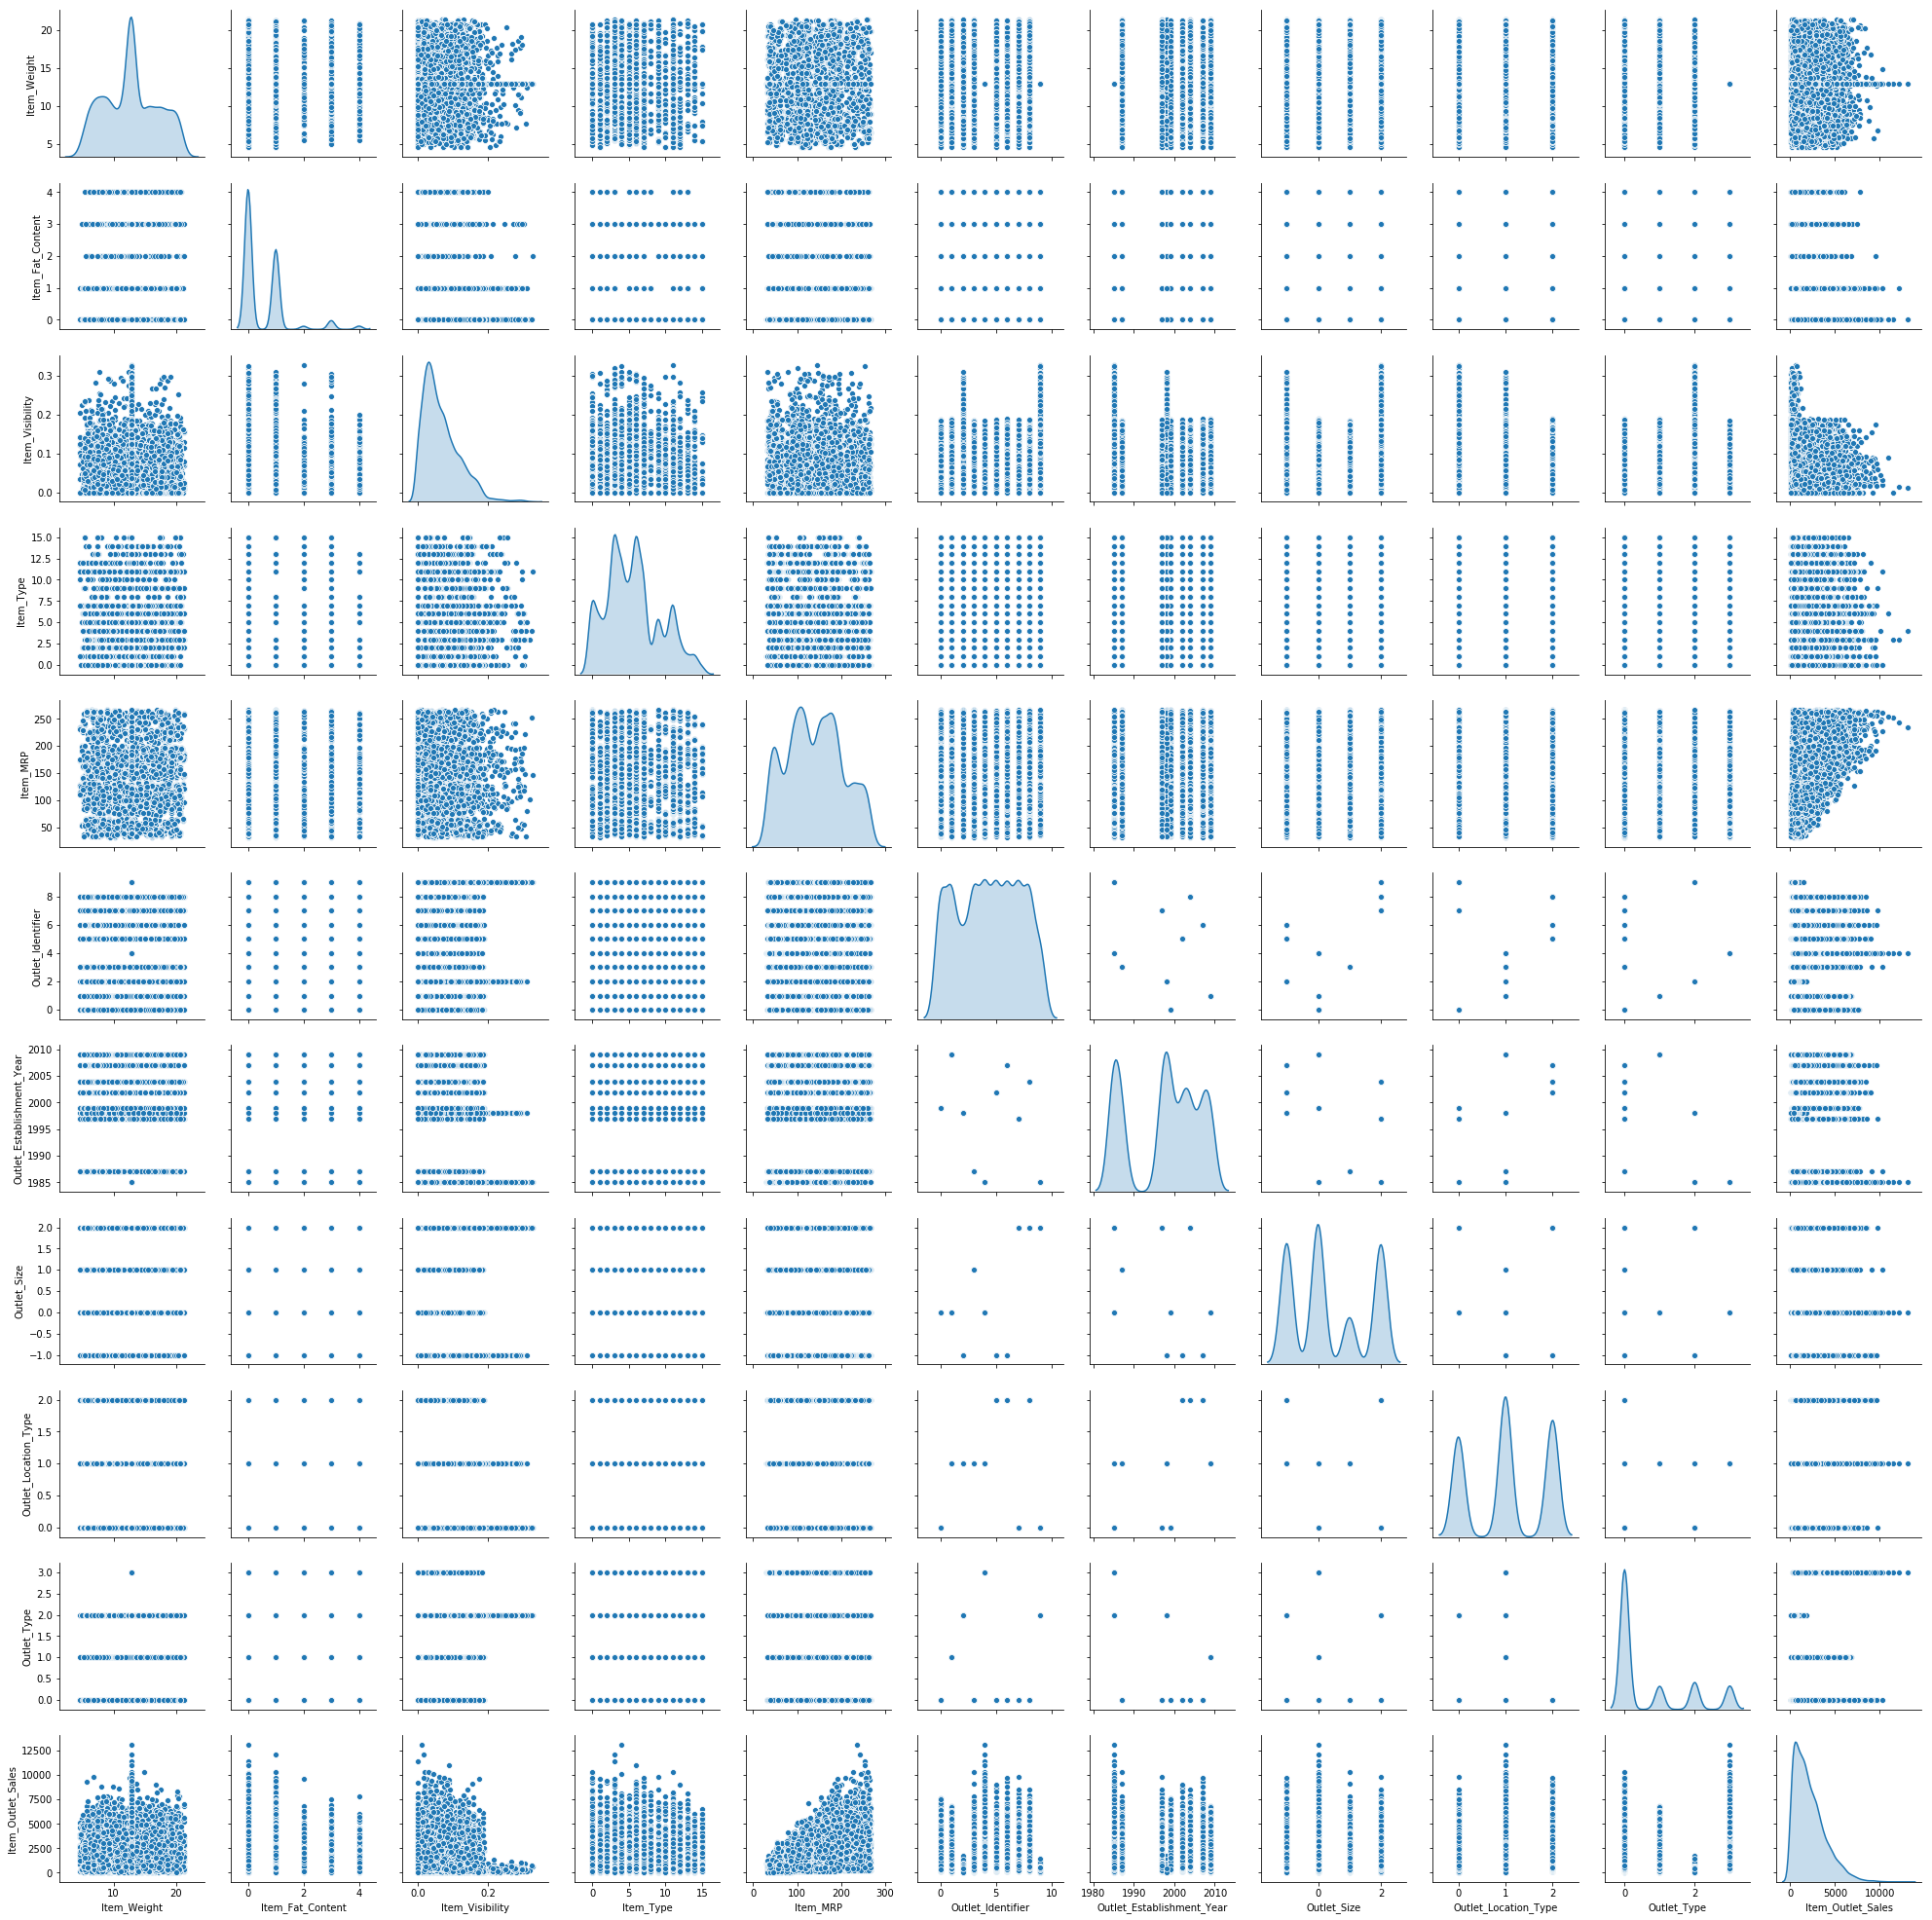

In [28]:
sns.pairplot(df, diag_kind = 'kde')

In [29]:
df1 = df

In [30]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,DRC01,5.92,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228


In [31]:

y=df1[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']].replace('?',0).astype('float')

In [32]:
from scipy.stats import zscore

In [33]:
df1 = df1.drop('Item_Identifier', axis =1)

In [34]:
df_z=df1.apply(zscore)

In [35]:
df_z.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,-0.652863,-0.970732,-1.540250,1.747454,-1.578678,0.139541,-0.331430,-1.345783,-0.652416,0.910601
1,-1.641706,0.575742,-0.908111,-1.267690,-1.489023,-1.219656,1.334103,-0.331430,-0.059896,0.290208,-1.018440
2,1.098554,-0.652863,-0.956917,-0.995131,0.010040,-1.578678,0.139541,-0.331430,-1.345783,-0.652416,-0.049238
3,1.500838,0.575742,-1.281758,-0.722572,0.660050,-0.860634,0.020085,-1.187943,-0.059896,1.232832,-0.849103
4,-0.929428,-0.652863,-1.281758,-0.450012,-1.399220,-0.501612,-1.293934,0.525083,-0.059896,-0.652416,-0.695373


In [36]:
x = df_z

In [37]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,-0.652863,-0.970732,-1.540250,1.747454,-1.578678,0.139541,-0.331430,-1.345783,-0.652416,0.910601
1,-1.641706,0.575742,-0.908111,-1.267690,-1.489023,-1.219656,1.334103,-0.331430,-0.059896,0.290208,-1.018440
2,1.098554,-0.652863,-0.956917,-0.995131,0.010040,-1.578678,0.139541,-0.331430,-1.345783,-0.652416,-0.049238
3,1.500838,0.575742,-1.281758,-0.722572,0.660050,-0.860634,0.020085,-1.187943,-0.059896,1.232832,-0.849103
4,-0.929428,-0.652863,-1.281758,-0.450012,-1.399220,-0.501612,-1.293934,0.525083,-0.059896,-0.652416,-0.695373


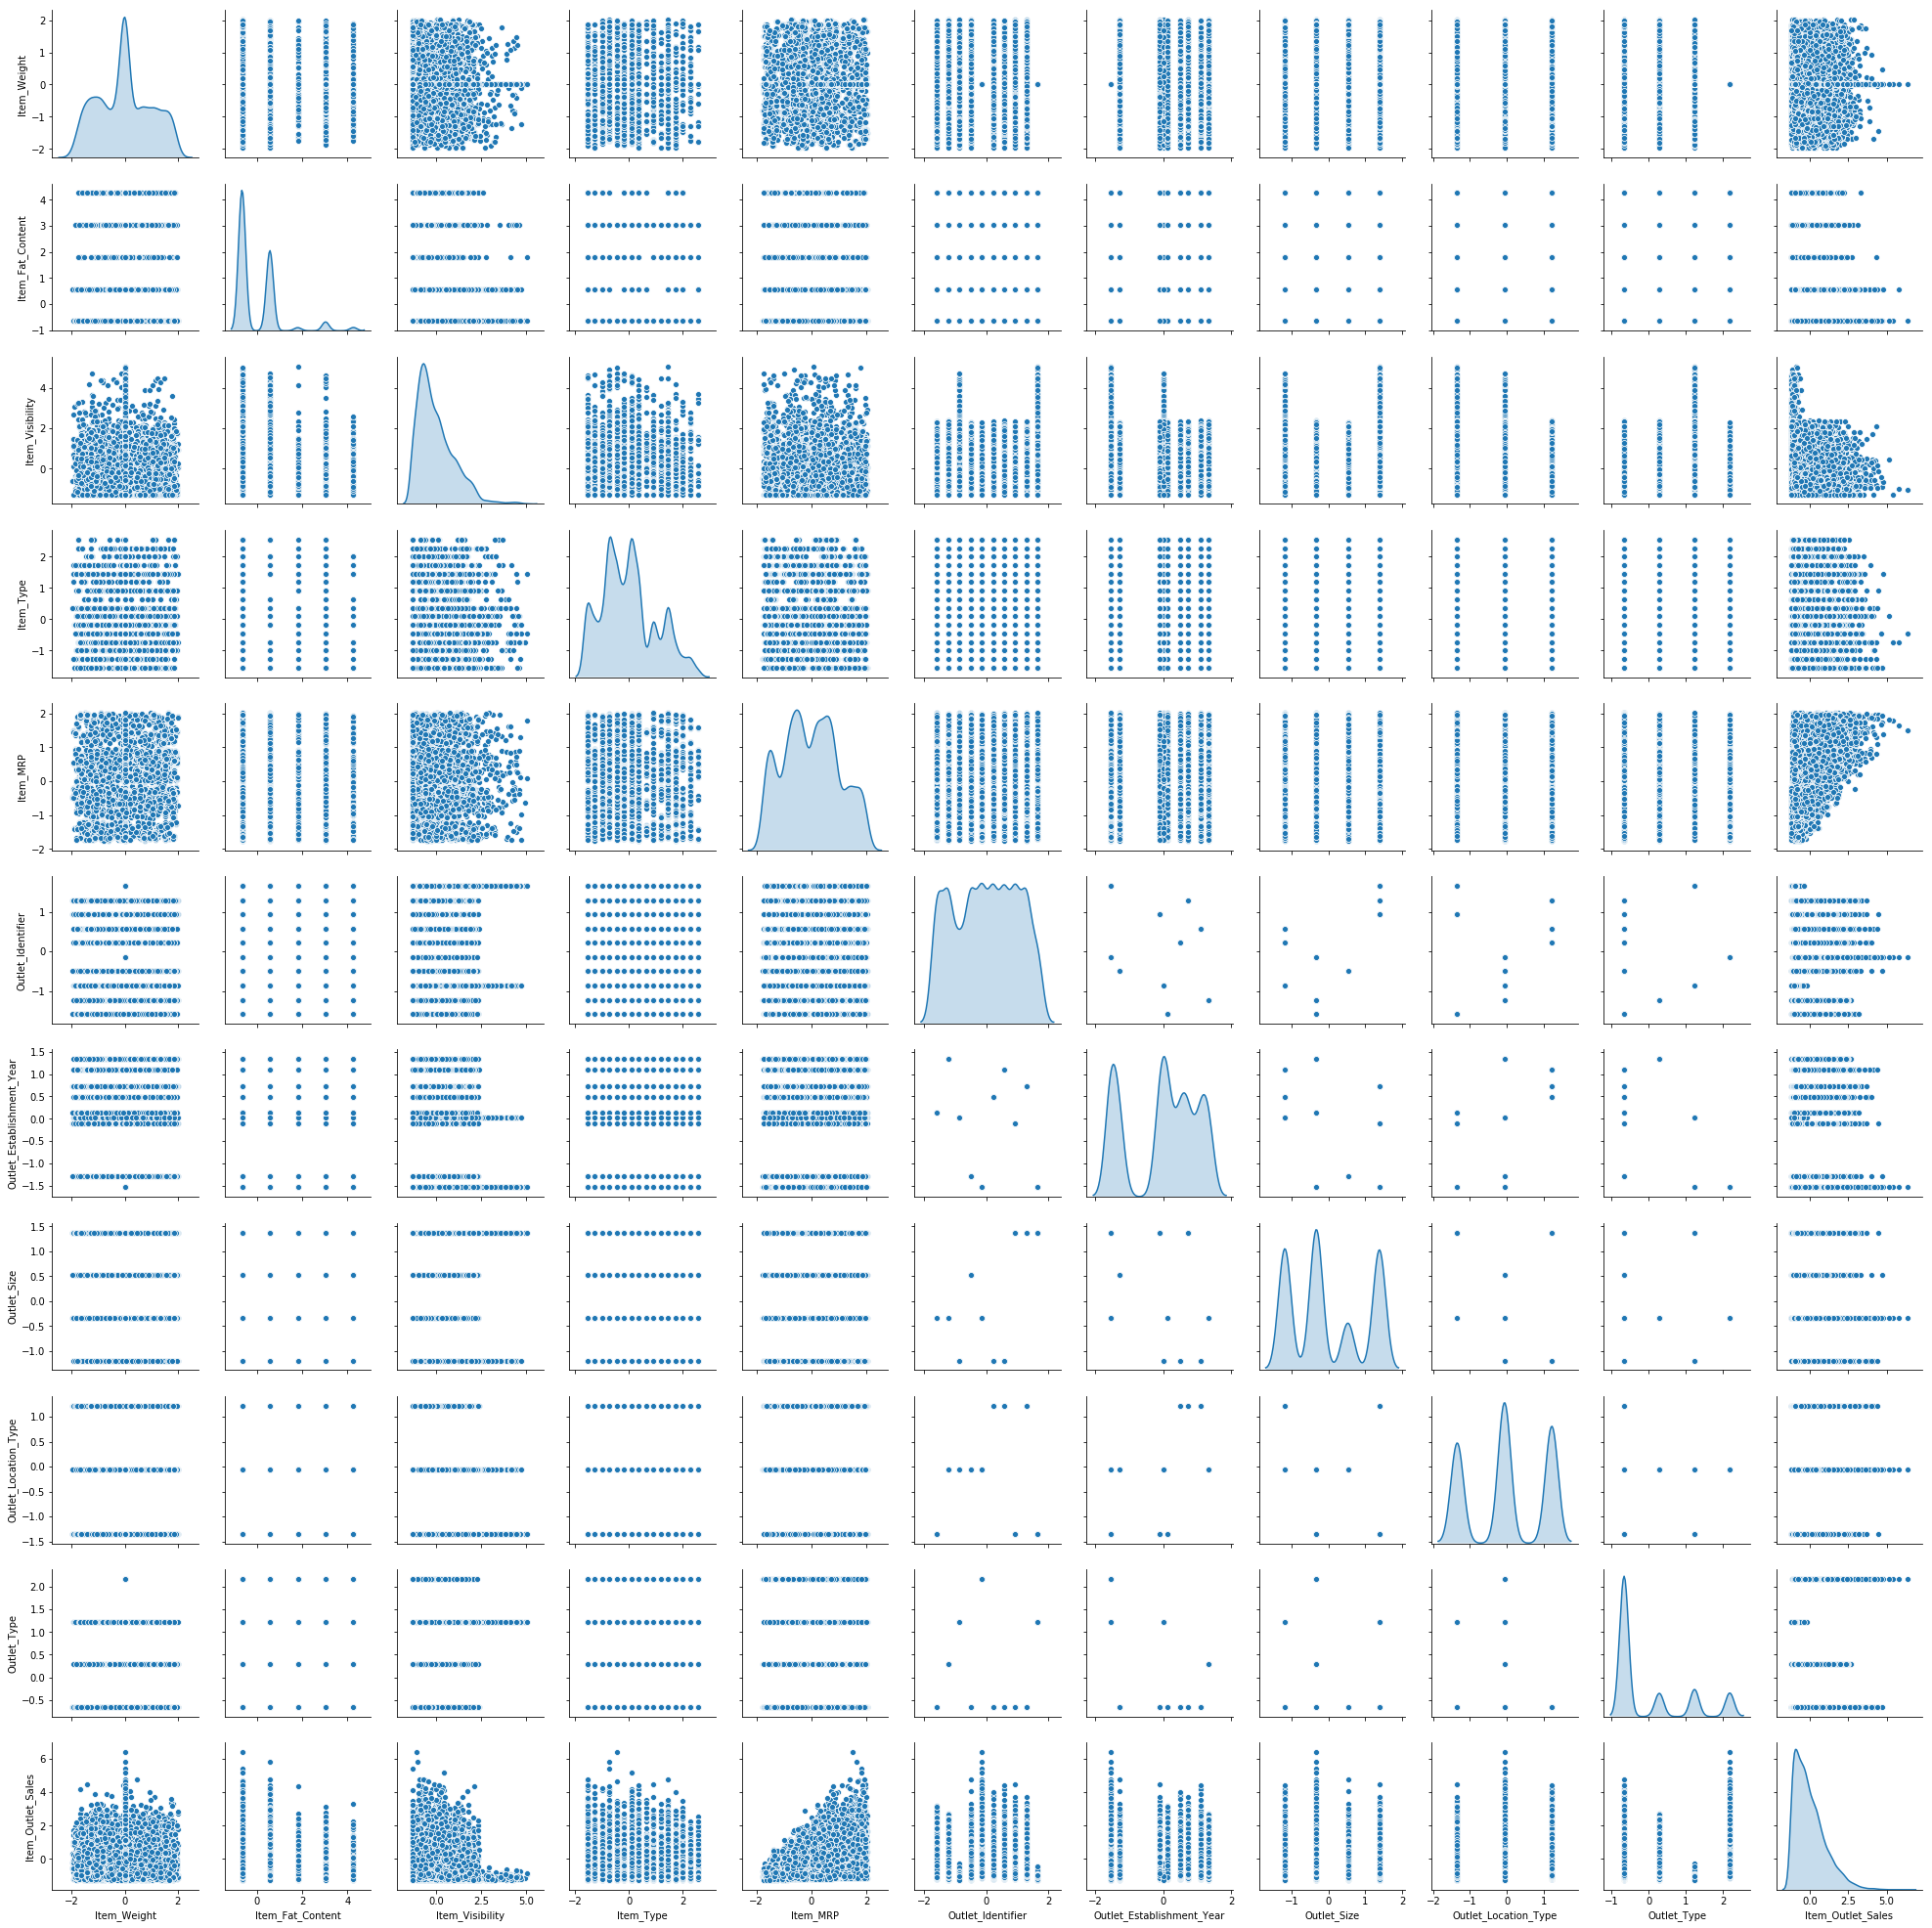

In [38]:
sns.pairplot(x, diag_kind = 'kde')

In [39]:
km=KMeans(n_clusters=4,# no of cluster
         n_init=20,# no times the random points
         max_iter=300) #no of times performing the means

In [40]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
cluster_range=range(1,20)
cluster_errors=[]

for i in cluster_range:
    clusters=KMeans(i,n_init=5)
    clusters.fit(x)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[:15]

,num_clusters,cluster_errors
0,1,93753.000000
1,2,80606.631486
2,3,71776.677279
3,4,64040.272246
4,5,59927.616829
5,6,55937.854078
6,7,52954.555038
7,8,50364.613926
8,9,48339.711698
9,10,46263.070878


In [42]:
y=km.labels_
print(y)

[3 3 3 ... 0 3 1]


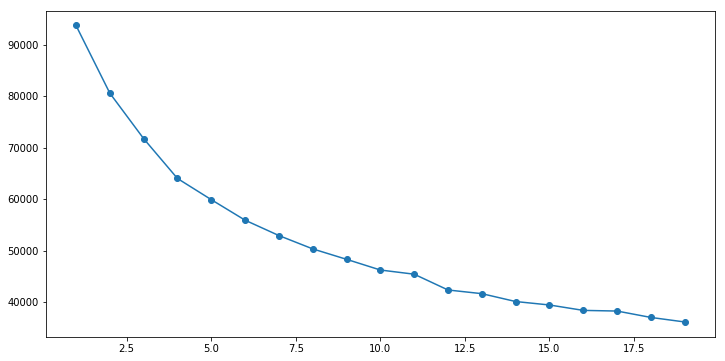

In [43]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [44]:
%matplotlib inline

from sklearn.datasets import make_blobs

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.1425034369715914


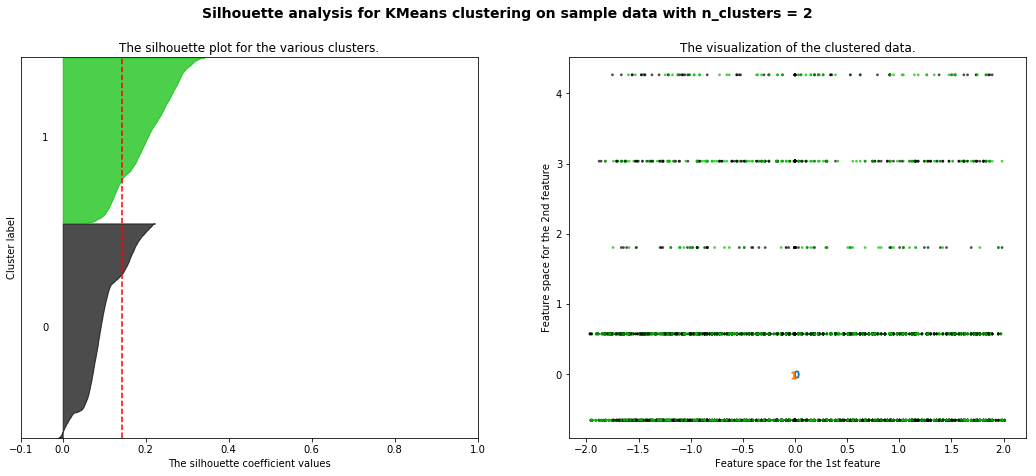

For n_clusters = 3 The average silhouette_score is : 0.16462051140280737


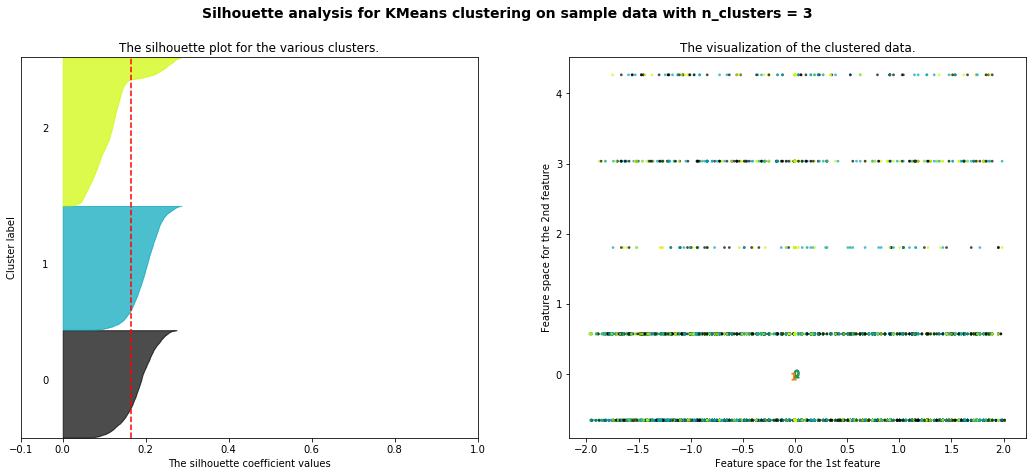

For n_clusters = 4 The average silhouette_score is : 0.18594376447058614


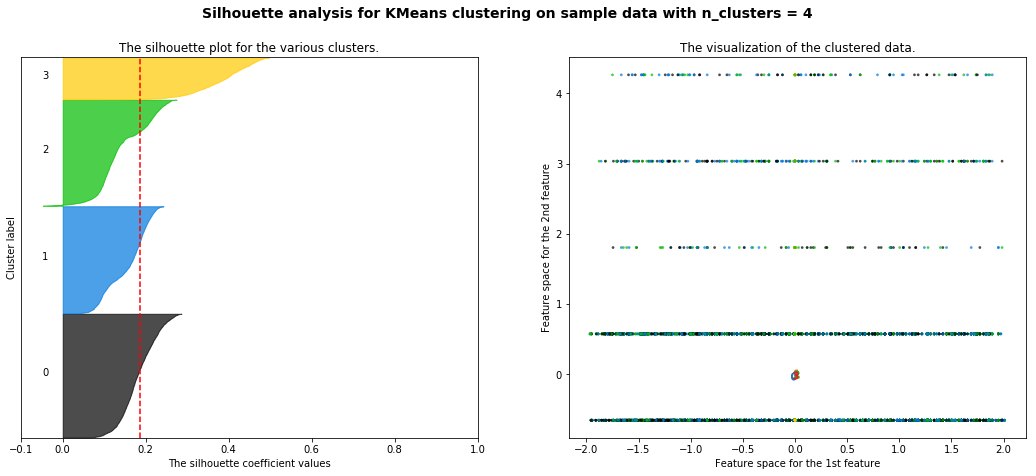

For n_clusters = 5 The average silhouette_score is : 0.19203767429178836


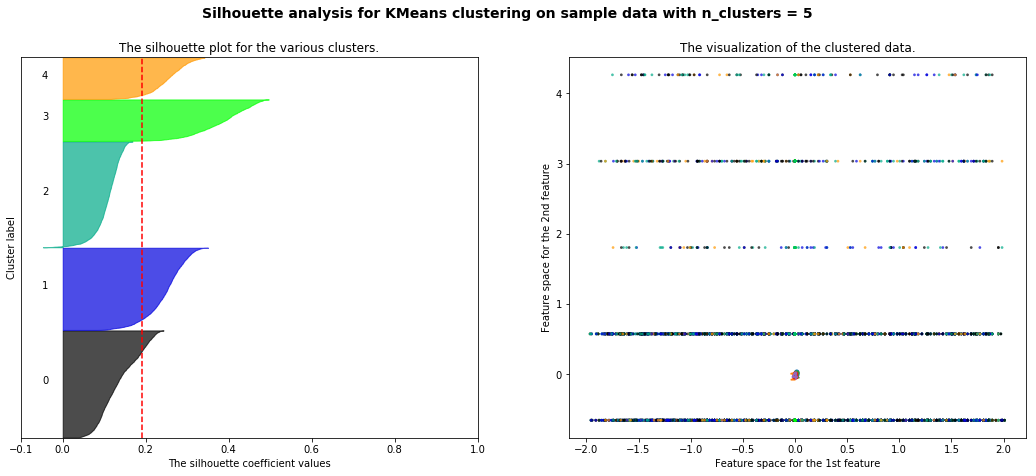

For n_clusters = 6 The average silhouette_score is : 0.20321556066154167


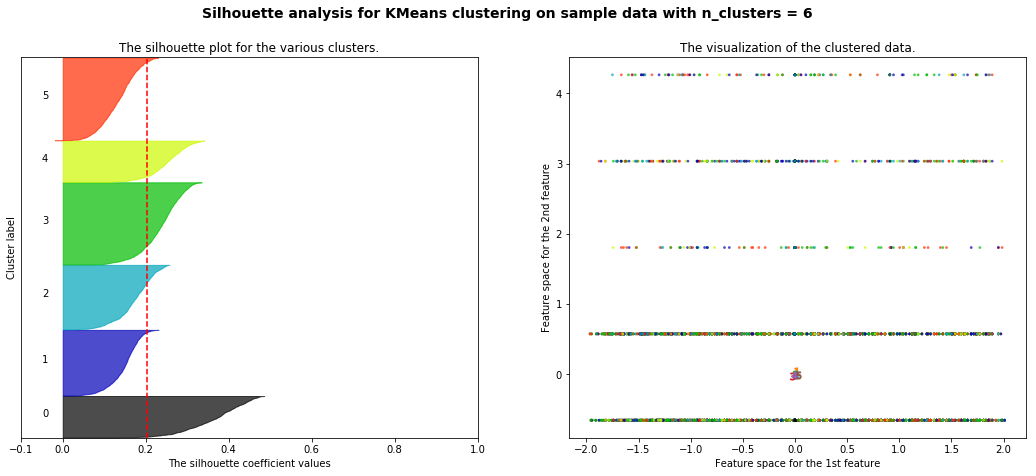

For n_clusters = 7 The average silhouette_score is : 0.19589756400679917


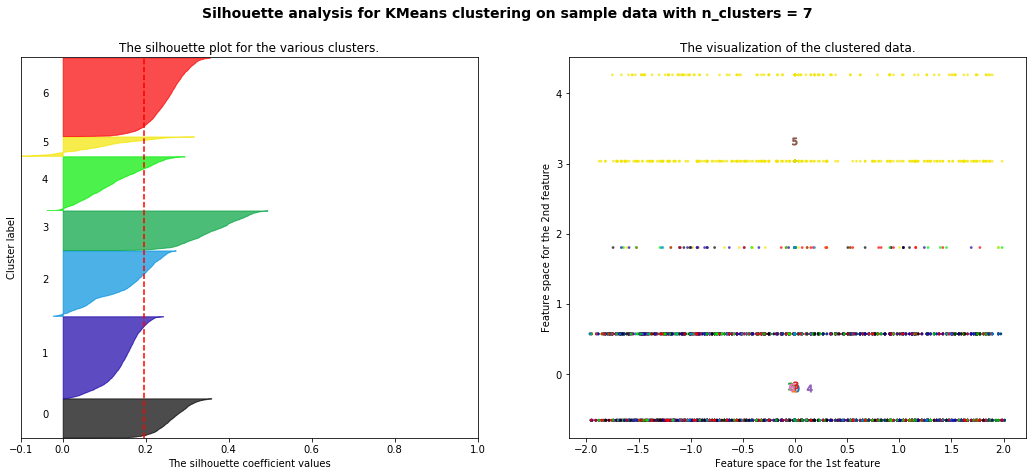

For n_clusters = 8 The average silhouette_score is : 0.21959090962302252


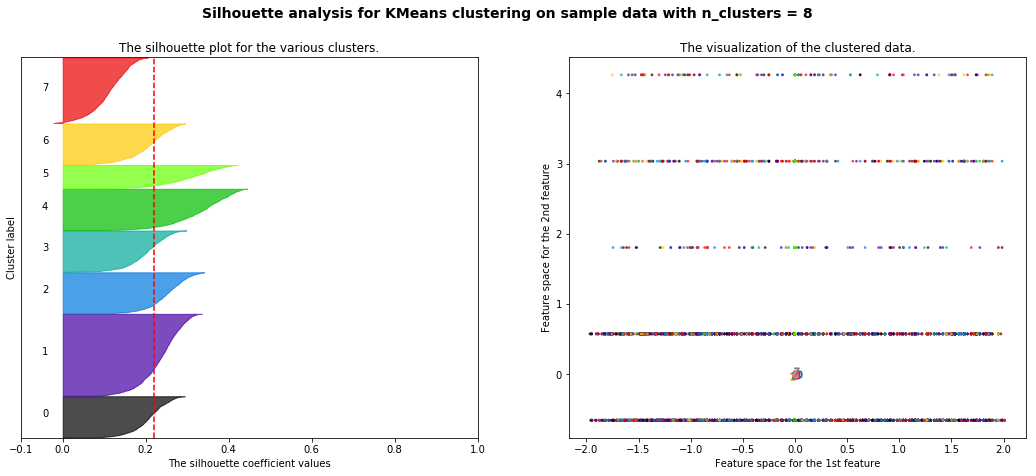

For n_clusters = 9 The average silhouette_score is : 0.18503084326190147


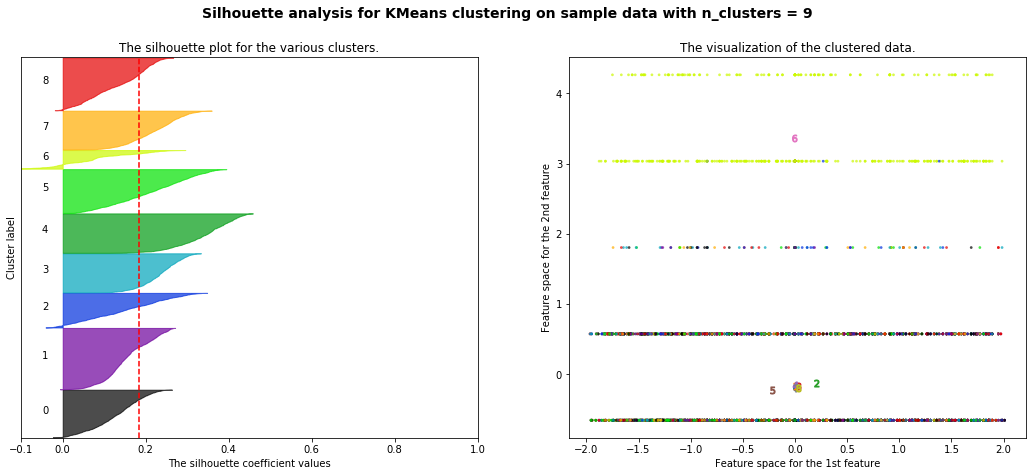

In [46]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x.iloc[:, 0], x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)

In [48]:
pca.fit_transform(df_z)

array([[-0.31573064,  1.99980878, -0.93842737, ...,  0.96605753,
        -1.98605616,  0.61206107],
       [-0.94482106, -1.73803804, -1.08749   , ...,  1.48536982,
        -1.68080739, -0.85303508],
       [-0.13054403,  0.21963843, -1.11175866, ...,  0.00956799,
        -0.43232683,  0.36740872],
       ...,
       [-0.55763456, -1.2287396 ,  2.18464737, ..., -0.51128051,
        -0.03031455, -0.44998836],
       [-0.67936301, -0.90659136, -1.14518685, ...,  1.10355362,
        -0.4943616 ,  1.28963122],
       [ 1.30592668, -1.22306582,  1.35578222, ..., -0.15287765,
        -0.90798801,  0.00414605]])

In [49]:
pca.explained_variance_

array([1.96583663, 1.58602444, 1.52626649, 1.05903105, 1.03026301,
       1.00898351, 0.95758325, 0.9231537 ])

In [50]:
pca.explained_variance_ratio_

array([0.17869145, 0.14416712, 0.13873522, 0.09626425, 0.09364928,
       0.09171501, 0.08704281, 0.08391322])

In [51]:
X_centered = x - x.mean(axis=0)

In [53]:
pca = PCA(n_components=8)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
X_pca = pca.transform(X_centered)

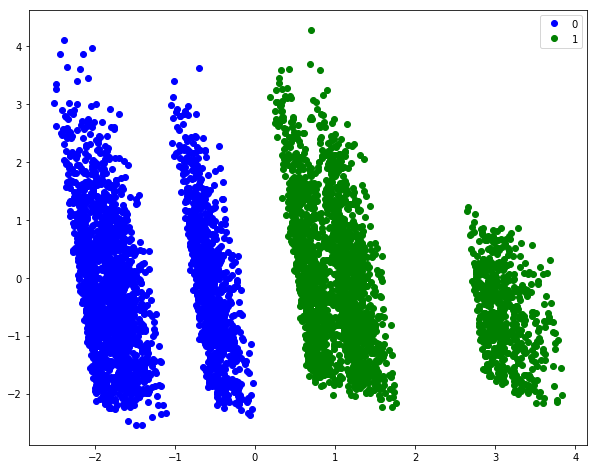

In [55]:
fig = plt.figure(1, figsize=(10, 8))

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='0')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='1')
plt.legend(loc=0)

plt.show()

In [52]:
#It is majorly explained by firdst 3 and then by the later

SyntaxError: invalid syntax (<ipython-input-52-376d5807cbff>, line 1)